## Methode de Reduction Globale ##

La MDS (MultiDimensions Scaling). 

Utilisable avec sklearn.manifold.MDS

Possibilite de metric=False pour **conserver** l'*ordre des points* en conservant les inegalites des valeurs dans la matrice de  depart D. 

Algorithme non lineaire Isomap pour conserver la structure geometrique globale du phenome (globe terrestre, swiss roll, etc).

## Methode de Reduction Locale ##

La LLE (Locally Linear Embedding) consiste a reconstruire chaque point grace a ses plus proches voisins.

le t-SNE (t-Stochastic neighbour Embedding) permet de visualiser des donnees de tres grandes dimensions grace a un plongement (embedding) a deux ou trois dimensions. (pratique pour visualisation)



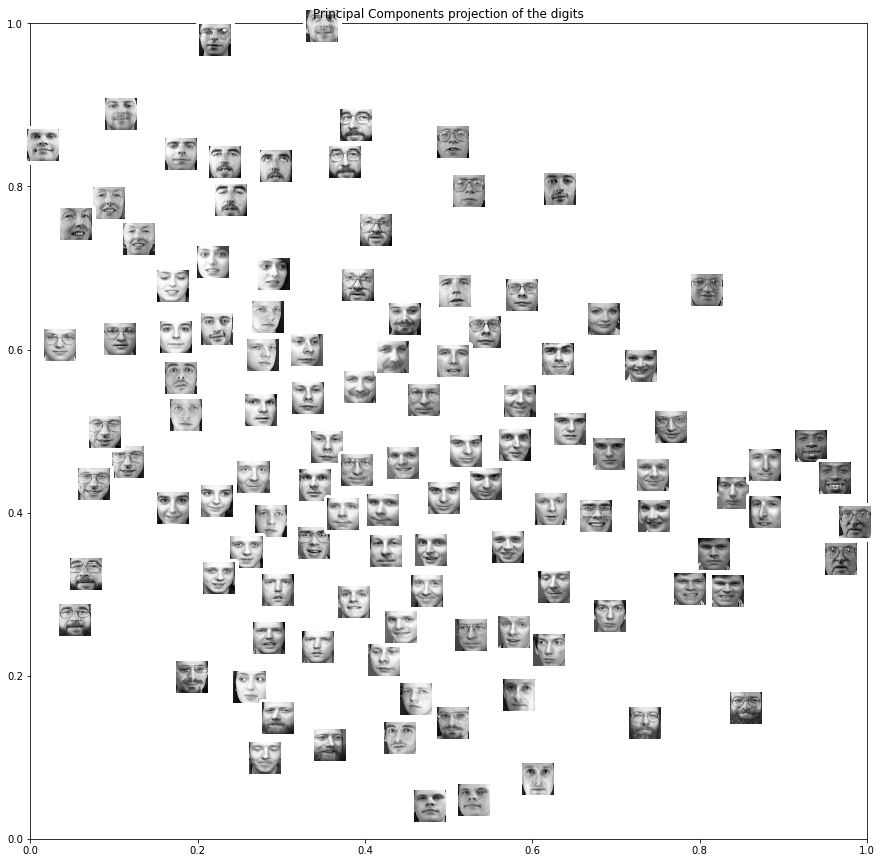

In [2]:
# Exemple sur le jeu de donnees de visages Olivetti

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn import (manifold, datasets, decomposition, ensemble,discriminant_analysis, random_projection)
from matplotlib import offsetbox

olivetti = fetch_olivetti_faces()
targets = olivetti.target
data = olivetti.data
images = olivetti.images

# fonction pour afficher une partie des images sur la visualisation 2D
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(15, 15))
    ax = plt.subplot(111)

    if hasattr(offsetbox, 'AnnotationBbox'):
        shown_images = np.array([[1., 1.]])
        for i in range(data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 2e-3:
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            props={ 'boxstyle':'round', 'edgecolor':'white'}
            imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(images[i], cmap=plt.cm.gray, zoom=0.5), X[i], bboxprops=props)
            ax.add_artist(imagebox)
    if title is not None:
        plt.title(title)
        
        
X = data
tsne = manifold.TSNE(n_components=2, perplexity=50, n_iter=1000, init='pca')
X_tsne = tsne.fit_transform(X)
plot_embedding(X_tsne, "Principal Components projection of the digits")
plt.show()

On peut avoir des resultats très différents avec un même dataset comme on travaille sur du local.

Il faut donc bien comprendre comment il marche pour choisir les bons paramètres. Par exemple, la perplexité représente le nombre de voisins proches pour chaque point. En général on peut prendre une perplexité de 5-50 pour 5-10k observations.

La t-SNE permet de visualiser la structure de données à très hautes dimensions pour pouvoir orienter par la suite la modélisation.

Si la t-SNE fournit un clustering satisfaisant (groupe bien séparés) on peut utiliser des algorithmes supervisés favorisant les structures locales (comme les SVM par exemple).

La t-SNE permet aussi de valider des features créées (si elles se retrouvent regroupées de manière significative) et montre qu'elles sont bien représentatives du phénomène et seront à même de bien le modéliser.

#### Problèmes Possibles : ####

- Faire attention à la nature des données évaluées, il faut une symétrie entre les données. Par exemple si roi est proche de reine et reine proche de femme, roi n'est pas pour autant proche de femme. la t-SNE classique n'est donc pas très bonne pour les textes comme vu dans cet exemple

- Non préservation de la structure globale. Pour y remédier on peut soit faire plusieurs visualisations (t-SNE pour le local et PCA ou Isomap pour le global) ou faire une PCA avant de faire un t-SNE pour conserver un peu plus la structure globale (possible avec init='pca')